## Linear Classifiers

### Support Vector Machine

In [59]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

In [81]:
class SVM(object):     
    def __init__(self, x, y, kernel=linear_kernel, c=None):
        self.x = x
        self.y = y
        self.kernel = kernel
        self.c = c
        self.n_samples, self.n_features = self.x.shape
        if self.c is not None: 
            self.c = float(self.c)

    def fit(self, n_iterations=30000, lr = 1e-3, eps = 10e-10):
        x = self.x
        y = self.y
        c = self.c
        n_samples = self.n_samples
        n_features = self.n_features
        
        #Gram Matrix, K
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.kernel(x[i], x[j])
        print("K >> ", K)
        #A matrix
        A = np.dot(np.diag(y), np.dot(np.diag(y),K).transpose())        
        print("A>>>")
        print(A)

        #lambda matrix
#         lambda_matrix = np.array([1.6201972, 9.6999250, 3.4647487, 0.2078965])
        lambda_matrix = np.random.uniform(0, c, n_samples)
        
        #fitting looooooop
        output_values = []        
        for i in range(n_iterations):
            print("lambda >> ",lambda_matrix)
            grad = np.dot(-1 * A, lambda_matrix) + np.ones(n_samples)
            print("grad >>", grad)
            lambda_matrix = lambda_matrix + lr * grad
            
            lambda_matrix = self.project(lambda_matrix, y)
            
            output = -0.5 * np.dot(np.diag(lambda_matrix), np.dot(np.diag(lambda_matrix), A).transpose()).sum() + lambda_matrix.sum()
            output_values.append(output)
            
            if(math.sqrt(np.dot(grad, grad.transpose())) < eps):
                break

#         print(grad)
        #final W        
        w = sum(np.dot(np.diag(lambda_matrix), np.dot(np.diag(y), x)))
        min_index = np.argmin(np.absolute(lambda_matrix-c/2))
        print("min_indx", min_index)
        print("x[min_index, ]", x[min_index, ])
        print("w", w)
        b = y[min_index] - sum(w * x[min_index,])
        return w, b, output_values, A, lambda_matrix
    
    def project(self, lambda_matrix, y):
        c = self.c
        lambda_matrix[lambda_matrix < 0] = 0
        lambda_matrix[lambda_matrix > c] = c
        m = (lambda_matrix * y).sum()
        if m != 0 :
            print(m)
            lambda_matrix = lambda_matrix - (m / self.n_samples) * y
        return lambda_matrix

In [82]:
x = [[1, 1],
    [3, 5],
    [-2,-3],
    [-5,-5],
    [4, 6],
    [7, 8], 
    [-4, 11]]
y = [1, 1, -1, -1, 1, 1, -1]
x = np.array(x)
y = np.array(y)

In [83]:
svm = SVM(x, y, c =10)
w, b, output_values, A, lambda_matrix= svm.fit()

K >>  [[  2.   8.  -5. -10.  10.  15.   7.]
 [  8.  34. -21. -40.  42.  61.  43.]
 [ -5. -21.  13.  25. -26. -38. -25.]
 [-10. -40.  25.  50. -50. -75. -35.]
 [ 10.  42. -26. -50.  52.  76.  50.]
 [ 15.  61. -38. -75.  76. 113.  60.]
 [  7.  43. -25. -35.  50.  60. 137.]]
A>>>
[[  2.   8.   5.  10.  10.  15.  -7.]
 [  8.  34.  21.  40.  42.  61. -43.]
 [  5.  21.  13.  25.  26.  38. -25.]
 [ 10.  40.  25.  50.  50.  75. -35.]
 [ 10.  42.  26.  50.  52.  76. -50.]
 [ 15.  61.  38.  75.  76. 113. -60.]
 [ -7. -43. -25. -35. -50. -60. 137.]]
lambda >>  [3.60578612 3.39863043 9.97221806 1.75248883 3.82451082 8.85082789
 4.24835212]
grad >> [ -242.05565589  -940.76667023  -591.41116306 -1214.27827945
 -1183.82232612 -1806.68944251   623.27514566]
0.7157764545544536
lambda >>  [3.26147669 2.35560998 9.48306067 0.64046433 2.53843471 6.94188467
 4.97388104]
grad >> [ -172.88322965  -646.13773768  -409.51048366  -868.41614824
  -820.02096733 -1278.92663191   246.6274469 ]
-2.1146212017124126
la

  0.40728099]
grad >> [ -6.46495403 -24.09103899 -15.27799651 -36.32477016 -31.55599302
 -52.60276667  -8.63848946]
0.04111054436593781
lambda >>  [ 1.78861358 -0.00587293  1.36060641  0.00587293 -0.00587293 -0.00587293
  0.40451544]
grad >> [ -6.41357365 -23.91780479 -15.16568922 -36.06786823 -31.33137844
 -52.23355745  -8.5761657 ]
0.04082002091376907
lambda >>  [ 1.77636858 -0.00583143  1.35127215  0.00583143 -0.00583143 -0.00583143
  0.4017707 ]
grad >> [ -6.36258006 -23.74587473 -15.0542274  -35.81290032 -31.1084548
 -51.86712772  -8.51431121]
0.04053168477896468
lambda >>  [ 1.76421576 -0.00579024  1.34200816  0.00579024 -0.00579024 -0.00579024
  0.39904663]
grad >> [ -6.31197037 -23.57523899 -14.94360468 -35.55985186 -30.88720937
 -51.50345655  -8.45292244]
0.04024551947693117
lambda >>  [ 1.75215443 -0.00574936  1.33281392  0.00574936 -0.00574936 -0.00574936
  0.39634307]
grad >> [ -6.26174168 -23.40588783 -14.83381476 -35.30870842 -30.66762951
 -51.14252317  -8.39199587]
0.039

lambda >>  [ 0.64390128 -0.00199305  0.48800212  0.00199305 -0.00199305 -0.00199305
  0.14792695]
grad >> [ -1.64648426  -7.84506965  -4.74577695 -12.23242129 -10.4915539
 -17.97819824  -2.7938105 ]
0.013865319534464682
lambda >>  [ 0.64027404 -0.00198076  0.4852371   0.00198076 -0.00198076 -0.00198076
  0.1471139 ]
grad >> [ -1.6313788   -7.79414004  -4.71275942 -12.15689402 -10.42551885
 -17.86965344  -2.77548799]
0.01377990834724277
lambda >>  [ 0.6366741  -0.00196856  0.4824929   0.00196856 -0.00196856 -0.00196856
  0.14630697]
grad >> [ -1.61638707  -7.74359385  -4.67999046 -12.08193534 -10.35998092
 -17.7619258   -2.75730343]
0.013695140162704206
lambda >>  [ 0.63310126 -0.00195645  0.47976936  0.00195645 -0.00195645 -0.00195645
  0.14550611]
grad >> [ -1.6015082   -7.69342819  -4.64746819 -12.00754098 -10.29493639
 -17.65500917  -2.73925576]
0.013611010140119228
lambda >>  [ 0.62955533 -0.00194443  0.47706632  0.00194443 -0.00194443 -0.00194443
  0.14471129]
grad >> [ -1.5867413

  0.07004297]
grad >> [-0.1994981  -2.96640584 -1.58295197 -4.99749051 -4.16590394 -7.58044248
 -1.03865589]
0.005683585617506107
lambda >>  [ 0.29542779 -0.00081194  0.22236377  0.00081194 -0.00081194 -0.00081194
  0.06981625]
grad >> [-0.19528602 -2.95220438 -1.5737452  -4.97643011 -4.1474904  -7.5501753
 -1.03354675]
0.005659769135066092
lambda >>  [ 0.29442396 -0.00080854  0.22159856  0.00080854 -0.00080854 -0.00080854
  0.06959124]
grad >> [-0.19110565 -2.93810982 -1.56460774 -4.95552825 -4.12921547 -7.52013599
 -1.02847607]
0.005636131950708806
lambda >>  [ 0.29342769 -0.00080516  0.22083912  0.00080516 -0.00080516 -0.00080516
  0.06936793]
grad >> [-0.18695675 -2.92412138 -1.55553907 -4.93478376 -4.11107813 -7.49032282
 -1.02344357]
0.0056126727146210975
lambda >>  [ 0.29243893 -0.00080181  0.22008539  0.00080181 -0.00080181 -0.00080181
  0.0691463 ]
grad >> [-0.18283909 -2.91023824 -1.54653867 -4.91419543 -4.09307733 -7.4607341
 -1.01844896]
0.005589390087151425
lambda >>  [ 0.

 -0.55067526]
0.0034088415119064783
lambda >>  [ 0.19955117 -0.00048698  0.14927785  0.00048698 -0.00048698 -0.00048698
  0.04832541]
grad >> [ 0.20398675 -1.60601484 -0.70101404 -2.98006624 -2.40202808 -4.68108028
 -0.5492398 ]
0.003402150029259962
lambda >>  [ 0.19926913 -0.00048602  0.14906286  0.00048602 -0.00048602 -0.00048602
  0.04826219]
grad >> [ 0.20516127 -1.60205483 -0.69844678 -2.97419365 -2.39689356 -4.67264043
 -0.54781514]
0.003395508922230936
lambda >>  [ 0.19898922 -0.00048507  0.14884948  0.00048507 -0.00048507 -0.00048507
  0.04819945]
grad >> [ 0.20632695 -1.59812463 -0.69589884 -2.96836527 -2.39179769 -4.66426412
 -0.54640121]
0.003388917811575652
lambda >>  [ 0.19871142 -0.00048413  0.14863772  0.00048413 -0.00048413 -0.00048413
  0.04813718]
grad >> [ 0.20748385 -1.59422402 -0.69337009 -2.96258077 -2.38674018 -4.65595086
 -0.54499792]
0.003382376320905503
lambda >>  [ 0.1984357  -0.0004832   0.14842754  0.0004832  -0.0004832  -0.0004832
  0.04807538]
grad >> [ 0

lambda >>  [ 0.17318543 -0.00039761  0.12917947  0.00039761 -0.00039761 -0.00039761
  0.0424155 ]
grad >> [ 0.31378538 -1.23581737 -0.46101599 -2.43107308 -1.92203198 -3.89208907
 -0.41605706]
0.0027813125847786432
lambda >>  [ 0.17310188 -0.00039733  0.12911579  0.00039733 -0.00039733 -0.00039733
  0.04239677]
grad >> [ 0.3141333  -1.23464433 -0.46025551 -2.42933349 -1.92051102 -3.889589
 -0.41563505]
0.0027793453402215965
lambda >>  [ 0.17301897 -0.00039705  0.12905258  0.00039705 -0.00039705 -0.00039705
  0.04237819]
grad >> [ 0.3144786  -1.23348011 -0.45950076 -2.42760699 -1.91900151 -3.88710775
 -0.41521621]
0.002777392905709615
lambda >>  [ 0.17293668 -0.00039677  0.12898985  0.00039677 -0.00039677 -0.00039677
  0.04235974]
grad >> [ 0.3148213  -1.23232467 -0.45875168 -2.4258935  -1.91750337 -3.88464518
 -0.41480053]
0.002775455169747927
lambda >>  [ 0.172855   -0.00039649  0.12892759  0.00039649 -0.00039649 -0.00039649
  0.04234144]
grad >> [ 0.31516142 -1.23117792 -0.45800825 -

lambda >>  [ 0.16530162 -0.00037089  0.12316972  0.00037089 -0.00037089 -0.00037089
  0.04064834]
grad >> [ 0.34661706 -1.12512198 -0.38925246 -2.26691471 -1.77850492 -3.65616717
 -0.37623314]
0.0025956715394068464
lambda >>  [ 0.16527743 -0.00037081  0.12315127  0.00037081 -0.00037081 -0.00037081
  0.04064291]
grad >> [ 0.34671781 -1.12478228 -0.38903224 -2.26641095 -1.77806447 -3.65544319
 -0.37611093]
0.002595101859901562
lambda >>  [ 0.16525342 -0.00037073  0.12313297  0.00037073 -0.00037073 -0.00037073
  0.04063753]
grad >> [ 0.3468178  -1.12444515 -0.38881367 -2.26591099 -1.77762735 -3.65472466
 -0.37598965]
0.002594536469125455
lambda >>  [ 0.16522959 -0.00037065  0.1231148   0.00037065 -0.00037065 -0.00037065
  0.04063219]
grad >> [ 0.34691704 -1.12411055 -0.38859675 -2.26541479 -1.77719351 -3.65401155
 -0.37586927]
0.0025939753347915956
lambda >>  [ 0.16520594 -0.00037057  0.12309678  0.00037057 -0.00037057 -0.00037057
  0.04062689]
grad >> [ 0.34701553 -1.12377847 -0.38838147

lambda >>  [ 0.16305444 -0.00036328  0.12145671  0.00036328 -0.00036328 -0.00036328
  0.04014463]
grad >> [ 0.3559753  -1.09356968 -0.36879719 -2.22012349 -1.73759438 -3.58892068
 -0.36488185]
0.00254275695732456
lambda >>  [ 0.16304717 -0.00036325  0.12145116  0.00036325 -0.00036325 -0.00036325
  0.040143  ]
grad >> [ 0.3560056  -1.09346753 -0.36873096 -2.21997199 -1.73746193 -3.58870295
 -0.3648451 ]
0.0025425856356851156
lambda >>  [ 0.16303995 -0.00036323  0.12144566  0.00036323 -0.00036323 -0.00036323
  0.04014138]
grad >> [ 0.35603567 -1.09336614 -0.36866523 -2.21982163 -1.73733047 -3.58848687
 -0.36480862]
0.002542415603809689
lambda >>  [ 0.16303278 -0.0003632   0.1214402   0.0003632  -0.0003632  -0.0003632
  0.04013977]
grad >> [ 0.35606552 -1.09326551 -0.3686     -2.21967241 -1.7372     -3.58827241
 -0.36477242]
0.002542246851988464
lambda >>  [ 0.16302567 -0.00036318  0.12143478  0.00036318 -0.00036318 -0.00036318
  0.04013818]
grad >> [ 0.35609514 -1.09316565 -0.36853525 -2

0.002526843776547029
lambda >>  [ 0.16237645 -0.00036098  0.12093989  0.00036098 -0.00036098 -0.00036098
  0.03999266]
grad >> [ 0.35879875 -1.08405013 -0.36262569 -2.20600624 -1.72525138 -3.56863194
 -0.36145708]
0.0025267922544124563
lambda >>  [ 0.16237428 -0.00036097  0.12093823  0.00036097 -0.00036097 -0.00036097
  0.03999217]
grad >> [ 0.35880779 -1.08401964 -0.36260592 -2.20596103 -1.72521185 -3.56856695
 -0.36144611]
0.002526741120152956
lambda >>  [ 0.16237213 -0.00036096  0.12093659  0.00036096 -0.00036096 -0.00036096
  0.03999169]
grad >> [ 0.35881677 -1.08398938 -0.36258631 -2.20591615 -1.72517261 -3.56850246
 -0.36143523]
0.002526690370848482
lambda >>  [ 0.16236999 -0.00036096  0.12093496  0.00036096 -0.00036096 -0.00036096
  0.03999121]
grad >> [ 0.35882568 -1.08395935 -0.36256684 -2.20587161 -1.72513367 -3.56843845
 -0.36142442]
0.0025266400036009495
lambda >>  [ 0.16236786 -0.00036095  0.12093334  0.00036095 -0.00036095 -0.00036095
  0.03999073]
grad >> [ 0.35883452 -1

lambda >>  [ 0.16217607 -0.0003603   0.12078713  0.0003603  -0.0003603  -0.0003603
  0.03994774]
grad >> [ 0.35963324 -1.08123656 -0.36080166 -2.20183378 -1.72160332 -3.56263544
 -0.36044487]
0.002522073763965696
lambda >>  [ 0.16217541 -0.0003603   0.12078663  0.0003603  -0.0003603  -0.0003603
  0.03994759]
grad >> [ 0.359636   -1.08122725 -0.36079562 -2.20181998 -1.72159125 -3.5626156
 -0.36044152]
0.0025220581520085453
lambda >>  [ 0.16217475 -0.00036029  0.12078613  0.00036029 -0.00036029 -0.00036029
  0.03994744]
grad >> [ 0.35963874 -1.08121801 -0.36078963 -2.20180628 -1.72157927 -3.56259591
 -0.36043819]
0.0025220426575831983
lambda >>  [ 0.16217409 -0.00036029  0.12078563  0.00036029 -0.00036029 -0.00036029
  0.0399473 ]
grad >> [ 0.35964146 -1.08120884 -0.36078369 -2.20179268 -1.72156738 -3.56257637
 -0.36043489]
0.002522027279804842
lambda >>  [ 0.16217345 -0.00036029  0.12078514  0.00036029 -0.00036029 -0.00036029
  0.03994715]
grad >> [ 0.35964416 -1.08119974 -0.36077779 -2

  0.03993376]
grad >> [ 0.35989299 -1.0803608  -0.36023391 -2.20053506 -1.72046781 -3.56076897
 -0.3601298 ]
0.0025206050808991506
lambda >>  [ 0.1621135  -0.00036009  0.12073944  0.00036009 -0.00036009 -0.00036009
  0.03993372]
grad >> [ 0.35989379 -1.08035809 -0.36023215 -2.20053103 -1.72046429 -3.56076318
 -0.36012883]
0.002520600525656974
lambda >>  [ 0.16211331 -0.00036009  0.12073929  0.00036009 -0.00036009 -0.00036009
  0.03993367]
grad >> [ 0.35989459 -1.08035539 -0.3602304  -2.20052703 -1.7204608  -3.56075743
 -0.36012786]
0.002520596004708109
lambda >>  [ 0.16211312 -0.00036009  0.12073915  0.00036009 -0.00036009 -0.00036009
  0.03993363]
grad >> [ 0.35989539 -1.08035271 -0.36022866 -2.20052307 -1.72045733 -3.56075173
 -0.36012689]
0.002520591517794421
lambda >>  [ 0.16211293 -0.00036008  0.12073901  0.00036008 -0.00036008 -0.00036008
  0.03993359]
grad >> [ 0.35989617 -1.08035006 -0.36022694 -2.20051913 -1.72045388 -3.56074607
 -0.36012594]
0.0025205870646596365
lambda >>  [

grad >> [ 0.35996901 -1.08010448 -0.36006774 -2.20015494 -1.72013547 -3.56022268
 -0.36003759]
0.0025201752208112577
lambda >>  [ 0.16209539 -0.00036003  0.12072563  0.00036003 -0.00036003 -0.00036003
  0.03992966]
grad >> [ 0.35996924 -1.0801037  -0.36006723 -2.20015378 -1.72013445 -3.560221
 -0.36003731]
0.002520173901693054
lambda >>  [ 0.16209533 -0.00036002  0.12072559  0.00036002 -0.00036002 -0.00036002
  0.03992964]
grad >> [ 0.35996948 -1.08010291 -0.36006672 -2.20015262 -1.72013344 -3.56021934
 -0.36003702]
0.002520172592505636
lambda >>  [ 0.16209527 -0.00036002  0.12072555  0.00036002 -0.00036002 -0.00036002
  0.03992963]
grad >> [ 0.35996971 -1.08010214 -0.36006622 -2.20015147 -1.72013243 -3.56021769
 -0.36003675]
0.0025201712931741532
lambda >>  [ 0.16209522 -0.00036002  0.1207255   0.00036002 -0.00036002 -0.00036002
  0.03992962]
grad >> [ 0.35996993 -1.08010137 -0.36006572 -2.20015033 -1.72013144 -3.56021605
 -0.36003647]
0.00252017000362445
lambda >>  [ 0.16209517 -0.00

 -0.36001165]
0.0025200543118778646
lambda >>  [ 0.16209029 -0.00036001  0.12072175  0.00036001 -0.00036001 -0.00036001
  0.03992851]
grad >> [ 0.35999047 -1.08003214 -0.36002084 -2.20004767 -1.72004167 -3.5600685
 -0.36001156]
0.002520053903000717
lambda >>  [ 0.16209027 -0.00036001  0.12072173  0.00036001 -0.00036001 -0.00036001
  0.03992851]
grad >> [ 0.35999054 -1.0800319  -0.36002068 -2.20004731 -1.72004136 -3.56006799
 -0.36001148]
0.0025200534972017116
lambda >>  [ 0.16209025 -0.00036001  0.12072172  0.00036001 -0.00036001 -0.00036001
  0.03992851]
grad >> [ 0.35999061 -1.08003166 -0.36002052 -2.20004695 -1.72004105 -3.56006748
 -0.36001139]
0.002520053094457707
lambda >>  [ 0.16209024 -0.00036001  0.12072171  0.00036001 -0.00036001 -0.00036001
  0.0399285 ]
grad >> [ 0.35999068 -1.08003142 -0.36002037 -2.2000466  -1.72004074 -3.56006697
 -0.3600113 ]
0.002520052694745707
lambda >>  [ 0.16209022 -0.00036001  0.12072169  0.00036001 -0.00036001 -0.00036001
  0.0399285 ]
grad >> [ 

lambda >>  [ 0.16208871 -0.00036     0.12072054  0.00036    -0.00036    -0.00036
  0.03992816]
grad >> [ 0.35999702 -1.08001004 -0.36000651 -2.20001489 -1.72001302 -3.56002139
 -0.36000361]
0.0025200168346445548
lambda >>  [ 0.16208871 -0.00036     0.12072054  0.00036    -0.00036    -0.00036
  0.03992816]
grad >> [ 0.35999705 -1.08000996 -0.36000646 -2.20001477 -1.72001292 -3.56002123
 -0.36000358]
0.002520016707907996
lambda >>  [ 0.1620887  -0.00036     0.12072054  0.00036    -0.00036    -0.00036
  0.03992816]
grad >> [ 0.35999707 -1.08000989 -0.36000641 -2.20001466 -1.72001282 -3.56002107
 -0.36000356]
0.002520016582125542
lambda >>  [ 0.1620887  -0.00036     0.12072053  0.00036    -0.00036    -0.00036
  0.03992816]
grad >> [ 0.35999709 -1.08000981 -0.36000636 -2.20001455 -1.72001272 -3.56002091
 -0.36000353]
0.0025200164572900183
lambda >>  [ 0.16208869 -0.00036     0.12072053  0.00036    -0.00036    -0.00036
  0.03992816]
grad >> [ 0.35999711 -1.08000974 -0.36000631 -2.20001444 -1

0.0025200052181082386
lambda >>  [ 0.16208822 -0.00036     0.12072017  0.00036    -0.00036    -0.00036
  0.03992805]
grad >> [ 0.35999908 -1.08000309 -0.360002   -2.20000458 -1.720004   -3.56000658
 -0.36000111]
0.0025200051788246552
lambda >>  [ 0.16208822 -0.00036     0.12072017  0.00036    -0.00036    -0.00036
  0.03992805]
grad >> [ 0.35999909 -1.08000306 -0.36000199 -2.20000455 -1.72000397 -3.56000653
 -0.3600011 ]
0.0025200051398368076
lambda >>  [ 0.16208822 -0.00036     0.12072017  0.00036    -0.00036    -0.00036
  0.03992805]
grad >> [ 0.3599991  -1.08000304 -0.36000197 -2.20000451 -1.72000394 -3.56000648
 -0.36000109]
0.002520005101142489
lambda >>  [ 0.16208822 -0.00036     0.12072016  0.00036    -0.00036    -0.00036
  0.03992805]
grad >> [ 0.3599991  -1.08000302 -0.36000196 -2.20000448 -1.72000391 -3.56000643
 -0.36000109]
0.002520005062739479
lambda >>  [ 0.16208821 -0.00036     0.12072016  0.00036    -0.00036    -0.00036
  0.03992805]
grad >> [ 0.35999911 -1.080003   -0.3

lambda >>  [ 0.16208807 -0.00036     0.12072006  0.00036    -0.00036    -0.00036
  0.03992802]
grad >> [ 0.35999969 -1.08000103 -0.36000067 -2.20000153 -1.72000134 -3.5600022
 -0.36000037]
0.002520001731247265
lambda >>  [ 0.16208807 -0.00036     0.12072006  0.00036    -0.00036    -0.00036
  0.03992802]
grad >> [ 0.3599997  -1.08000102 -0.36000066 -2.20000152 -1.72000133 -3.56000218
 -0.36000037]
0.002520001718213871
lambda >>  [ 0.16208807 -0.00036     0.12072006  0.00036    -0.00036    -0.00036
  0.03992802]
grad >> [ 0.3599997  -1.08000102 -0.36000066 -2.20000151 -1.72000132 -3.56000217
 -0.36000037]
0.002520001705278614
lambda >>  [ 0.16208807 -0.00036     0.12072005  0.00036    -0.00036    -0.00036
  0.03992802]
grad >> [ 0.3599997  -1.08000101 -0.36000065 -2.2000015  -1.72000131 -3.56000215
 -0.36000036]
0.0025200016924407306
lambda >>  [ 0.16208807 -0.00036     0.12072005  0.00036    -0.00036    -0.00036
  0.03992802]
grad >> [ 0.3599997  -1.080001   -0.36000065 -2.20000149 -1.7

lambda >>  [ 0.16208802 -0.00036     0.12072002  0.00036    -0.00036    -0.00036
  0.03992801]
grad >> [ 0.3599999  -1.08000032 -0.36000021 -2.20000048 -1.72000042 -3.56000069
 -0.36000012]
0.0025200005406922077
lambda >>  [ 0.16208802 -0.00036     0.12072002  0.00036    -0.00036    -0.00036
  0.03992801]
grad >> [ 0.35999991 -1.08000032 -0.36000021 -2.20000047 -1.72000041 -3.56000068
 -0.36000012]
0.0025200005366217
lambda >>  [ 0.16208802 -0.00036     0.12072002  0.00036    -0.00036    -0.00036
  0.03992801]
grad >> [ 0.35999991 -1.08000032 -0.36000021 -2.20000047 -1.72000041 -3.56000068
 -0.36000011]
0.002520000532581848
lambda >>  [ 0.16208802 -0.00036     0.12072002  0.00036    -0.00036    -0.00036
  0.03992801]
grad >> [ 0.35999991 -1.08000032 -0.3600002  -2.20000047 -1.72000041 -3.56000067
 -0.36000011]
0.0025200005285724095
lambda >>  [ 0.16208802 -0.00036     0.12072002  0.00036    -0.00036    -0.00036
  0.039928  ]
grad >> [ 0.35999991 -1.08000031 -0.3600002  -2.20000046 -1.7

lambda >>  [ 0.16208801 -0.00036     0.12072001  0.00036    -0.00036    -0.00036
  0.039928  ]
grad >> [ 0.35999997 -1.0800001  -0.36000006 -2.20000015 -1.72000013 -3.56000021
 -0.36000004]
0.002520000165080409
lambda >>  [ 0.16208801 -0.00036     0.12072001  0.00036    -0.00036    -0.00036
  0.039928  ]
grad >> [ 0.35999997 -1.0800001  -0.36000006 -2.20000014 -1.72000013 -3.56000021
 -0.36000004]
0.0025200001638376462
lambda >>  [ 0.16208801 -0.00036     0.12072001  0.00036    -0.00036    -0.00036
  0.039928  ]
grad >> [ 0.35999997 -1.0800001  -0.36000006 -2.20000014 -1.72000013 -3.56000021
 -0.36000003]
0.0025200001626042162
lambda >>  [ 0.16208801 -0.00036     0.12072001  0.00036    -0.00036    -0.00036
  0.039928  ]
grad >> [ 0.35999997 -1.0800001  -0.36000006 -2.20000014 -1.72000012 -3.56000021
 -0.36000003]
0.0025200001613800913
lambda >>  [ 0.16208801 -0.00036     0.12072001  0.00036    -0.00036    -0.00036
  0.039928  ]
grad >> [ 0.35999997 -1.0800001  -0.36000006 -2.20000014 -

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.35999999 -1.08000003 -0.36000002 -2.20000004 -1.72000004 -3.56000006
 -0.36000001]
0.002520000048532381
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.35999999 -1.08000003 -0.36000002 -2.20000004 -1.72000004 -3.56000006
 -0.36000001]
0.0025200000481670065
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.35999999 -1.08000003 -0.36000002 -2.20000004 -1.72000004 -3.56000006
 -0.36000001]
0.002520000047804394
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.35999999 -1.08000003 -0.36000002 -2.20000004 -1.72000004 -3.56000006
 -0.36000001]
0.002520000047444508
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.35999999 -1.08000003 -0.36000002 -2.20000004 -1.72000004 -3.56000006
 -0.36000001]
0.0025200000470873077
lam

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36       -1.08000001 -0.36000001 -2.20000001 -1.72000001 -3.56000002
 -0.36      ]
0.0025200000155048835
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36       -1.08000001 -0.36000001 -2.20000001 -1.72000001 -3.56000002
 -0.36      ]
0.0025200000153881505
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36       -1.08000001 -0.36000001 -2.20000001 -1.72000001 -3.56000002
 -0.36      ]
0.0025200000152723195
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36       -1.08000001 -0.36000001 -2.20000001 -1.72000001 -3.56000002
 -0.36      ]
0.002520000015157349
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36       -1.08000001 -0.36000001 -2.20000001 -1.72000001 -3.56000002
 -0.36      ]
0.002520000015043239
la

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36       -1.08       -0.36       -2.2        -1.72       -3.56000001
 -0.36      ]
0.002520000004356239
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36       -1.08       -0.36       -2.2        -1.72       -3.56000001
 -0.36      ]
0.0025200000043234527
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36       -1.08       -0.36       -2.2        -1.72       -3.56000001
 -0.36      ]
0.0025200000042909093
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36       -1.08       -0.36       -2.2        -1.72       -3.56000001
 -0.36      ]
0.0025200000042586226
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36       -1.08       -0.36       -2.2        -1.72       -3.56000001
 -0.36      ]
0.002520000004226558
la

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000012331955
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000012239043
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000012147172
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000012055718
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000011965026
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000001187482
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.0003

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000003491527
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000346502
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000343907
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000003413117
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000003387235
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000336177
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036 

0.0025200000001003725
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000996092
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000098839
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000980757
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000097347
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000966047
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000095883
lambda >>  [ 0.162088 -0.00036   0.1207

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.00252000000003038
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000301787
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000299497
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000297415
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000295195
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000292766
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000089595
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000008904
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000088207
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000087375
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000008682
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000086056
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000002562
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000002541
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000025133
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000024786
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.00252000000000243
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000024023
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000006675
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000006814
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000006953
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000709
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000007022
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000006884
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.00252

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000258
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000258
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000258
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000258
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000258
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000258
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000000847
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000000986
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000000847
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000001055
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000000986
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000000000847
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   

grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.0025200000

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0.00036   0.039928]
grad >> [ 0.36 -1.08 -0.36 -2.2  -1.72 -3.56 -0.36]
0.002520000000000071
lambda >>  [ 0.162088 -0.00036   0.12072   0.00036  -0.00036  -0

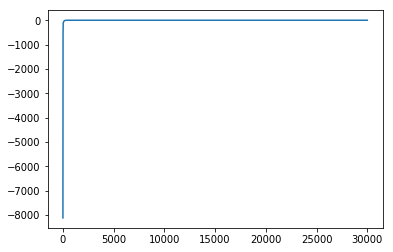

In [84]:
plt.plot(output_values)

In [85]:
L_x = np.linspace(-10, 10, 100)
L_y = -w[0]/w[1]*L_x + -b/w[1]
L_yy = -w[0]/w[1]*L_x + 1/w[1]-b/w[1]
L_yyy = -w[0]/w[1]*L_x + -1/w[1]-b/w[1]

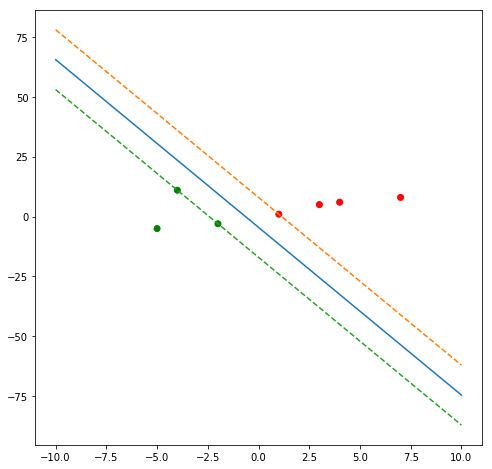

In [86]:
plt.figure(figsize=(8,8))
colors = ['green', 'red']
plt.scatter(x[:,0], x[:,1], c = y,  cmap=matplotlib.colors.ListedColormap(colors))
plt.plot(L_x, L_y)
plt.plot(L_x, L_yy, linestyle='--')
plt.plot(L_x, L_yyy, linestyle='--')